# Lesson 39: Machine Learning - TensorFlow - Linear Regression - Simple Example

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-03-20 23:40:58.870220: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 23:40:59.340595: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 23:40:59.340627: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-20 23:41:00.458530: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Generate random input data to train on and targets

In [2]:
observations = 2000

# Inputs:

xs = np.random.uniform(low = -10, high = 10, size = (observations, 1))
zs = np.random.uniform(low = -10, high = 10, size = (observations, 1))

generated_inputs = np.column_stack((xs, zs))

print(generated_inputs.shape)


# Targets:

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

print(generated_targets.shape)

# TensorFlow likes working on data stored in ".npz" files, so we save our arrays of inputs and targets 
# in such a file:

np.savez("TF_intro", inputs = generated_inputs, targets = generated_targets)

(2000, 2)
(2000, 1)


## Building the model via TensorFlow

In [3]:
# We load the saved data:

training_data = np.load("TF_intro.npz")

# Defining the size of data:

inputs_size = 2
outputs_size = 1

# "keras" is the package on which TF2 is built. "Sequential" is a method which works on layers. 
# In this simple example we have one layer: Layer = linear combination + output.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(outputs_size,
                         kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                         bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1))
])

# Dense() method is precisely the multiplication of two arrays and adding a bias.
# Dense() is equivalent to "np.dot(weights, inputs) + biases"

# To make the model more precise we can set initializers forweights and biases in the Dense() function.

2023-03-20 23:41:01.513722: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-20 23:41:01.514148: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-20 23:41:01.514177: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alina-XPS): /proc/driver/nvidia/version does not exist
2023-03-20 23:41:01.515052: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Configuring the model for training (loss function + optimization)

In [4]:
# It needs "model.compile(optimizer, loss)"

# model.compile(optimizer = "sgd", loss = "mean_squared_error")

# SGD - Stochastic Gradient Descent

# To improve precision we can vary on optimizers (now we know one: learning_rate), so we define:

custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.022)

model.compile(optimizer = custom_optimizer, loss = "mean_squared_error")

# "loss" can be also optimized but it is harder and left for future

## Indicating to the model which data to fit and setting the number of iteration

In [5]:
model.fit(training_data["inputs"], training_data["targets"], epochs = 200, verbose = 2)

# epoch - the iteration over one dataset
# verbose = 0 means the model is silent; verbose = 1 shows the info how model performs


Epoch 1/200
63/63 - 1s - loss: 17.3234 - 701ms/epoch - 11ms/step
Epoch 2/200
63/63 - 0s - loss: 0.3989 - 158ms/epoch - 3ms/step
Epoch 3/200
63/63 - 0s - loss: 0.3987 - 172ms/epoch - 3ms/step
Epoch 4/200
63/63 - 0s - loss: 0.3923 - 149ms/epoch - 2ms/step
Epoch 5/200
63/63 - 0s - loss: 0.3665 - 134ms/epoch - 2ms/step
Epoch 6/200
63/63 - 0s - loss: 0.3759 - 87ms/epoch - 1ms/step
Epoch 7/200
63/63 - 0s - loss: 0.3897 - 90ms/epoch - 1ms/step
Epoch 8/200
63/63 - 0s - loss: 0.3977 - 88ms/epoch - 1ms/step
Epoch 9/200
63/63 - 0s - loss: 0.3900 - 76ms/epoch - 1ms/step
Epoch 10/200
63/63 - 0s - loss: 0.4294 - 88ms/epoch - 1ms/step
Epoch 11/200
63/63 - 0s - loss: 0.4147 - 75ms/epoch - 1ms/step
Epoch 12/200
63/63 - 0s - loss: 0.3950 - 74ms/epoch - 1ms/step
Epoch 13/200
63/63 - 0s - loss: 0.3729 - 87ms/epoch - 1ms/step
Epoch 14/200
63/63 - 0s - loss: 0.3906 - 88ms/epoch - 1ms/step
Epoch 15/200
63/63 - 0s - loss: 0.3878 - 77ms/epoch - 1ms/step
Epoch 16/200
63/63 - 0s - loss: 0.3894 - 72ms/epoch - 1ms

63/63 - 0s - loss: 0.3775 - 129ms/epoch - 2ms/step
Epoch 131/200
63/63 - 0s - loss: 0.3949 - 122ms/epoch - 2ms/step
Epoch 132/200
63/63 - 0s - loss: 0.3912 - 142ms/epoch - 2ms/step
Epoch 133/200
63/63 - 0s - loss: 0.3567 - 120ms/epoch - 2ms/step
Epoch 134/200
63/63 - 0s - loss: 0.4119 - 113ms/epoch - 2ms/step
Epoch 135/200
63/63 - 0s - loss: 0.3776 - 116ms/epoch - 2ms/step
Epoch 136/200
63/63 - 0s - loss: 0.4093 - 76ms/epoch - 1ms/step
Epoch 137/200
63/63 - 0s - loss: 0.4123 - 76ms/epoch - 1ms/step
Epoch 138/200
63/63 - 0s - loss: 0.3683 - 65ms/epoch - 1ms/step
Epoch 139/200
63/63 - 0s - loss: 0.4043 - 74ms/epoch - 1ms/step
Epoch 140/200
63/63 - 0s - loss: 0.3814 - 66ms/epoch - 1ms/step
Epoch 141/200
63/63 - 0s - loss: 0.3717 - 76ms/epoch - 1ms/step
Epoch 142/200
63/63 - 0s - loss: 0.3870 - 76ms/epoch - 1ms/step
Epoch 143/200
63/63 - 0s - loss: 0.4202 - 75ms/epoch - 1ms/step
Epoch 144/200
63/63 - 0s - loss: 0.3813 - 66ms/epoch - 1ms/step
Epoch 145/200
63/63 - 0s - loss: 0.3915 - 76ms/e

## Extract the weights and biases

In [6]:
model.layers[0].get_weights()

[array([[ 1.9707854],
        [-3.019476 ]], dtype=float32),
 array([5.008861], dtype=float32)]

In [7]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9707854],
       [-3.019476 ]], dtype=float32)

In [8]:
bias = model.layers[0].get_weights()[1]
bias

array([5.008861], dtype=float32)

## Extract the outputs

In [9]:
out = model.predict_on_batch(training_data["inputs"]).round(1)

In [10]:
tar = training_data["targets"].round(1)

## Plotting data to compare outputs and targets

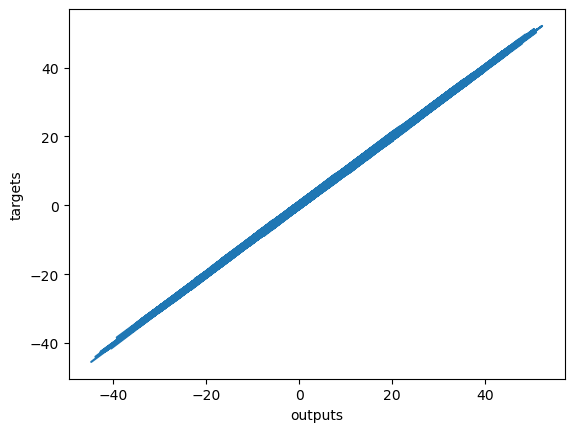

In [11]:
plt.plot(np.squeeze(out), np.squeeze(tar))
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()